In [1]:
from meta_processing import *
import matplotlib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import ms_plotter_tools as msp
matplotlib.rcParams['font.family'] = 'serif'

# Automated deconvolution and quantification of mass spectra 
*Author - Lawrence Collins*

It is recommended to restart your computer before devconvolving large dataets (40+) as it is quite RAM intensive.
## Step 1: Load input file

Make sure to use double backslash. 
e.g. ``` path = "D:\\mass spec 2\\240215 abraxas labelling\\Meta2_input_file_abraxas.xlsx" ```

### Setting up the input file

Sheet 1 of input file contains the directory folder of your mass spectra and the unidec configuration parameters. 

You can also add masses to detect and a corresponding colour. These are done by stipulating **Species** + *name* and **Color** + *name* in the Parameter column, followed by the desired mass or colour in the Input column.

A list of accepted colour names can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html)


**Example input directory**

| Parameter | Input | Comments |
| --- | --- |--- |
|Directory|D:\mass spec 2\240215 abraxas labelling|
|Species Abraxas| 48127|
|Color Abraxas| orange|
|Start Scan|	490	|
|End Scan|540	|
|Tolerance (Da)	|10	|Peak matching tolerance |
|Config masslb	|15000|	Deconvolution window low mass|
|Config massub	|50000|	Deconvolution window high mass|
|Config massbins|	1|Mass bins for deconvolution - sample mass every|
|Config peakwindow|	10|	|
|Config peakthresh|0.05|	|
|Config minmz|	700|	m/z lower bounds (defaults to 0)|
|Config maxmz|		|m/z upper bounds (defaults to 10e12)|
|Config startz|	1	| |
|Config endz|	100	| |
|Config numz|	100	| |
|Config numit|	60	|number of iterations of deconvolution algorithm|

### Defining variables of different spectra

Each file within the directory can be linked to custom variables defined in a second sheet of the input directory. This comes in handy if wanting to filter data or perform analyses/comparison on subsets of your experiment. 

Any column names can be defined aside from 'Name' in column 0. Name corresponds to your filename (can be partial match).

Make sure var_ids=True ```load_input_file(var_ids = True)```  

**Example variables table**

|Name|	Peptide	|Catalyst|Time|
| --- | --- | --- | --- |
|240126 DoE Nexp 1	|1	|1	|1|
|240126 DoE Nexp 2	|2	|13	|3|
|240126 DoE Nexp 3	|1	|25	|3|
|240126 DoE Nexp 4	|3	|25	|1|
|240126 DoE Nexp 5	|2	|13	|5|
|240126 DoE Nexp 6	|3	|1	|3|
|240126 DoE Nexp 7	|3	|13	|1|
|240126 DoE Nexp 8	|2	|1	|5|
|240126 DoE Nexp 9	|1	|25	|5|




In [2]:
path = "Meta2_input_file_v3.xlsx" # path to input file

path = "Alexandra_MS_input_file.xlsx" # path to input file

path = "240308 DoE input file.xlsx"

eng = Meta2() # load engine

eng.load_input_file(path, unzip=True, clearhdf5=True, var_ids=True) # load input file and run deconvolution

eng.on_unidec() # run deconvolution


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe
Unzipped 240214_doe_exp_11_3-2-48_1_9731.zip
Unzipped 240214_doe_exp_12_3-2-49_1_9732.zip
Unzipped 240214_doe_exp_13_3-2-50_1_9733.zip
Unzipped 240214_doe_exp_14_1-1-30_1_9597.zip
Unzipped 240214_doe_exp_15_1-1-31_1_9598.zip
Unzipped 240214_doe_exp_16_1-1-32_1_9599.zip
Unzipped 240214_doe_exp_17_1-1-33_1_9600.zip
Unzipped 240214_doe_exp_1_3-2-45_1_9728.zip
Unzipped 240214_doe_exp_2_3-2-46_1_9729.zip
Unzipped 240214_doe_exp_3_3-2-47_1_9730.zip
Unzipped 240214_doe_exp_4_1-1-26_1_9593.zip
Unzipped 240214_doe_exp_5_1-1-27_1_9594.zip
Unzipped 240214_doe_exp_6_1-1-28_1_9595.zip
Unzipped 240214_doe_exp_7_1-1-29_1_9596.zip
Unzipped 240308_Nexp_10_3-1-16_1_10665.zip
Unzipped 240308_Nexp_8_3-1-14_1_10663.zip
Unzipped 240308_Nexp_9_3-1-15_1_10664.zip
Specified BAF has 745 spectra with line and profile data.
Specified BAF has 745 spectra with line and profile data.
Specified BAF has

## Step 2: Plotting mass spectra

Mass spectra can be plotted separately and exported to *UniDec_Figures_and_Files* within your directory. 

### Useful commands

You can plot the deconvolved spectrum ```attr = "massdat"``` or the raw spectrum ```attr = "data2"``` (make sure to change the xlabel to m/z if plotting the raw spectrum ```xlabel = "m/z"```)

```window= [12000, 14000] ``` A mass window over which to plot over 

```legend = True``` to add a legend of the masses found within the spectra

```show_peaks = True``` to pick the peaks that correspond to defined species from the input file found in the spectrum

```fmt="svg"``` to plot in vector format (editable in photoshop) or ```fmt = 'png'``` for image files

### Combining spectra to a single figure 
Spectra can be stacked for nice made-for-publication figures. This can be combined with any defined variables within the second sheet of your input file to separate desired mass spectra to be stacked - e.g. if plotting a time course. 

To separate groups of spectra by variables from the second sheet of the input file into combined figures, define ```groupby = [variable_x]``` and ```combine = True``` (can be grouped by more than one variable by writing a list of variables into groupby).

In [3]:
spectra = eng.eng.data.spectra

# add in zoomed function that plots over window using min and max masses contained in masslist 
msp.plot_spectra_separate(spectra, attr = "massdat", xlabel = "Mass [Da]", 
                          export=True, c='black',lw=0.7,window=[None, None],
                         show_peaks=False,legend=False, directory =eng.directory, fmt='png')

# msp.plot_spectra_separate(spectra, attr = "data2", xlabel = "m/z", export=False)


# eng.plot_spectra(combine=True, groupby='GVSEYG',show_titles=True)
# eng.group_spectra("GVSEYG")

Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_11_3-2-48_1_9731.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_12_3-2-49_1_9732.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_13_3-2-50_1_9733.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_14_1-1-30_1_9597.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_15_1-1-31_1_9598.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_16_1-1-32_1_9599.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe_exp_17_1-1-33_1_9600.d_massdat_img.png
Fig exported to:  E:\mass spectra\DoE MODDE experiment\UniDec_Figures_and_Files\240214_doe

In [9]:
# df1 = pd.DataFrame([s.name for s in spectra],columns=['Name'])
# df2 = eng.var_ids


# r = '({})'.format('|'.join(df2.Name))
# merge_df = df1.Name.str.extract(r, expand=False).fillna(df1.Name)
# # merge_df
# df2=df2.merge(df1, left_on='Name', right_on=merge_df, how='outer')
# df2


C:\Users\cm19ljc\AppData\Local\Temp\ipykernel_32948\598661570.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.barplot(d, x='Name', y='Percentage_Labelling', hue='Label',palette= eng.colors_dict)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


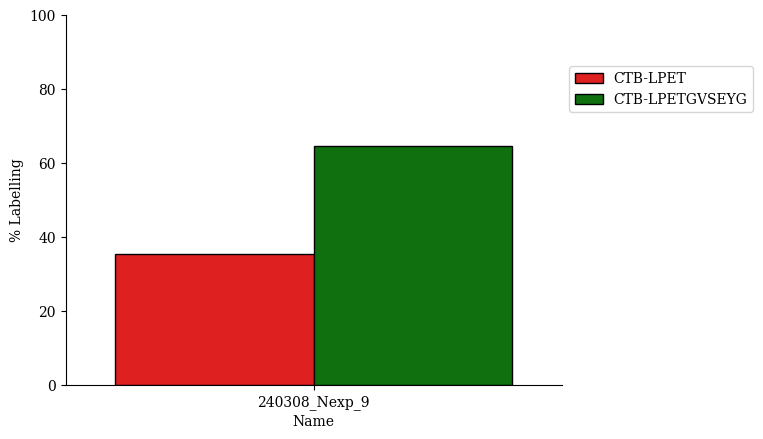

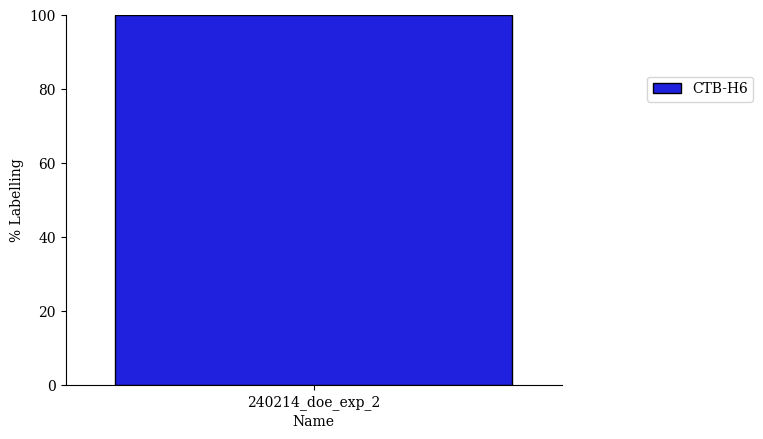

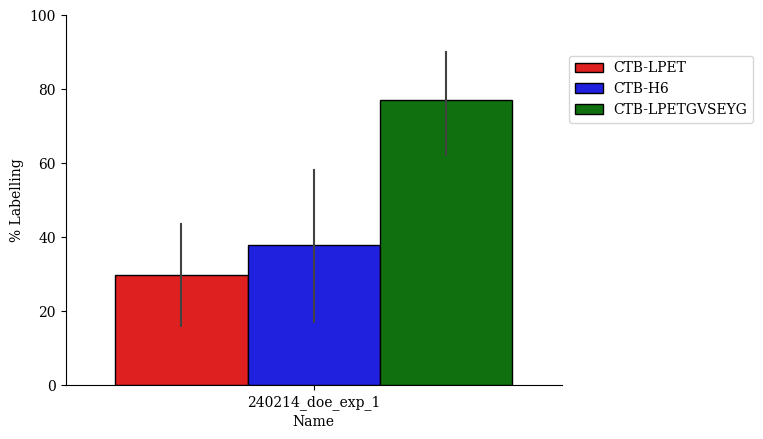

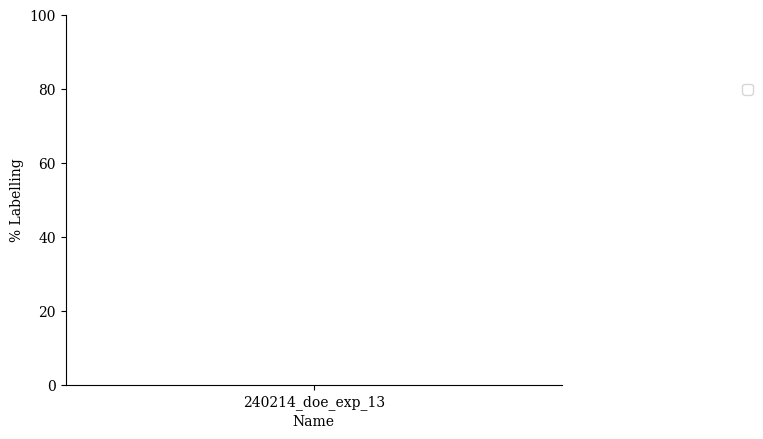

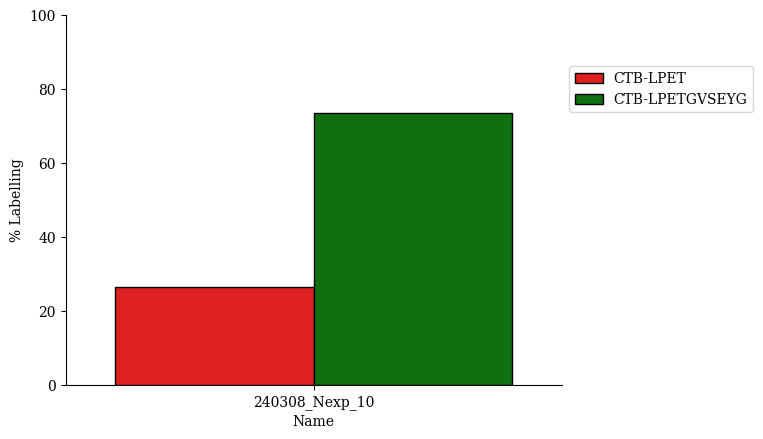

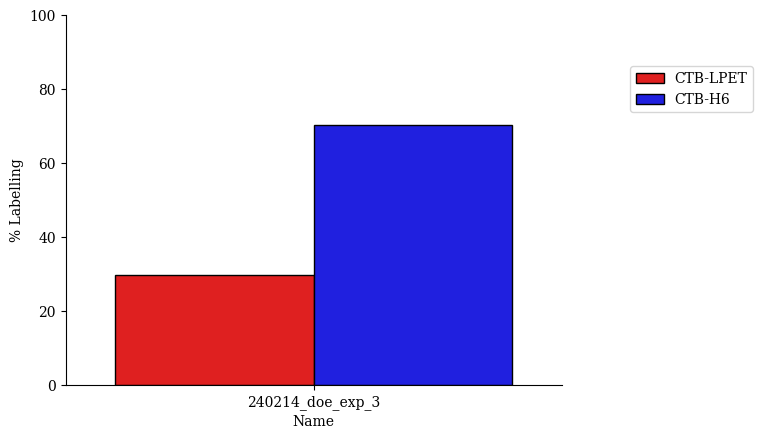

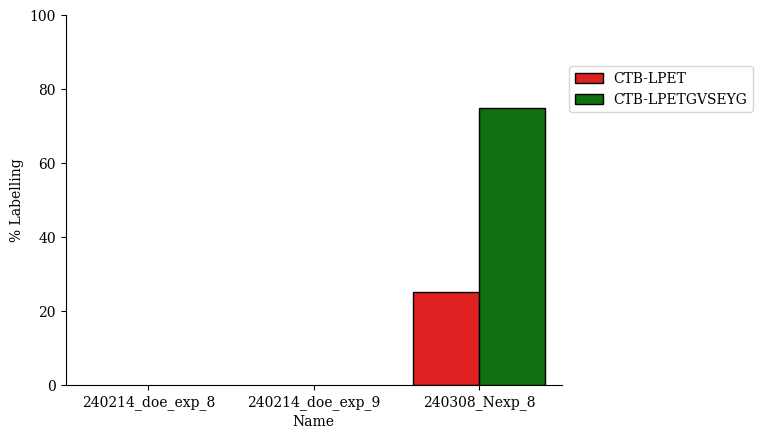

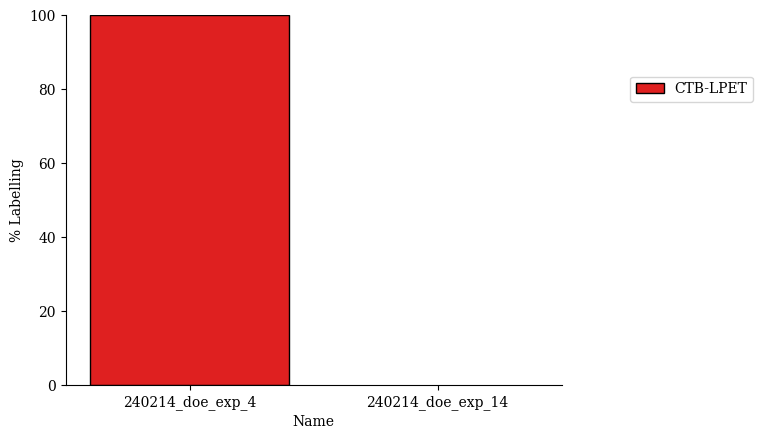

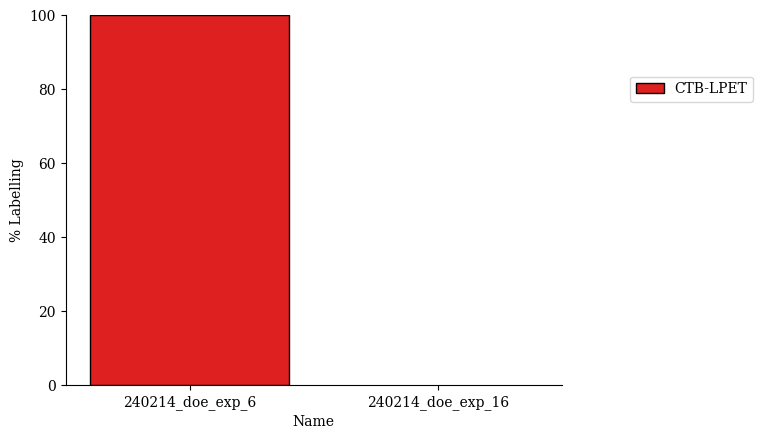

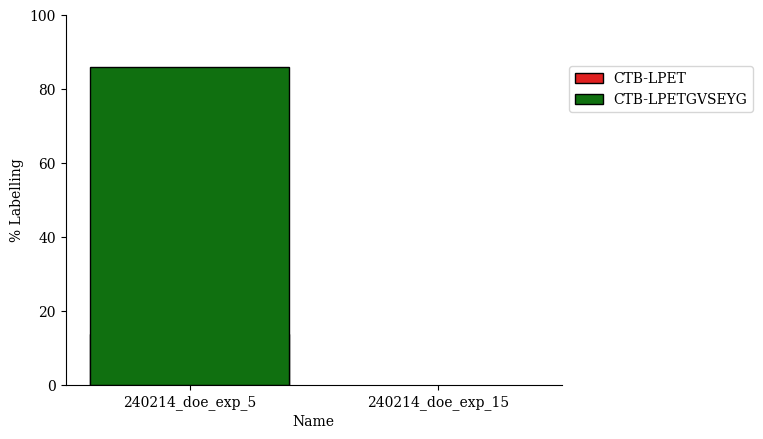

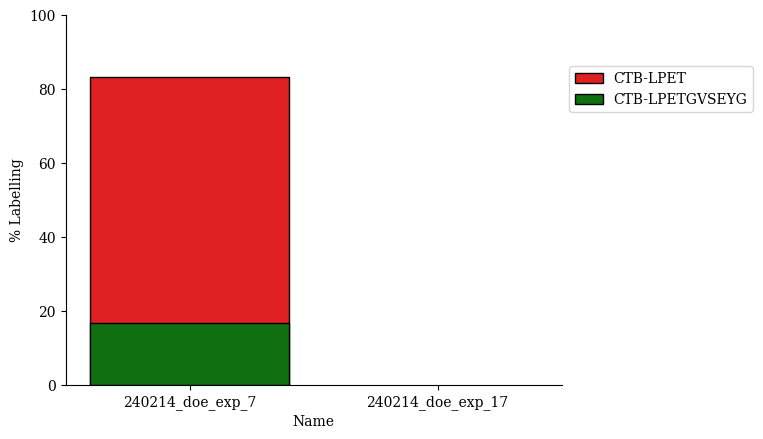

In [5]:
groupby = ['Time',"Substrate","Catalyst"]
for n,d in eng.results1.groupby(groupby):
    fig, ax = plt.subplots()
    # eng.results1['Species'] = eng.results1['Name']
    sns.barplot(d, x='Name', y='Percentage_Labelling', hue='Label',palette= eng.colors_dict)
    ax.set_ylim(0, 100)
    ax.set_ylabel("% Labelling")

    ax.legend(loc = 'right',bbox_to_anchor=(1.4, 0.8))
#     ax.tick_params(axis='x', labelrotation=10, labelsize='x-small')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

## Step 3: Quantification and analysis
A variety of useful statistical plotting tools taken from [Seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/) can used to display your quantified data. Defined variables can be used to filter and select subsets of the data. 

Text(0.5, 0, 'Experiment')

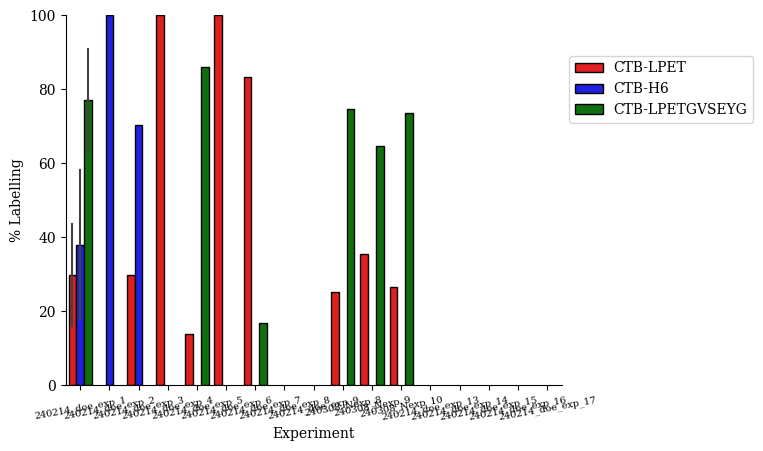

In [6]:
fig, ax = plt.subplots()
# eng.results1['Species'] = eng.results1['Name']
sns.barplot(eng.results1, x='Name', y='Percentage_Labelling', hue='Label',palette= eng.colors_dict)
ax.set_ylim(0, 100)
ax.set_ylabel("% Labelling")

ax.legend(loc = 'right',bbox_to_anchor=(1.4, 0.8))
ax.tick_params(axis='x', labelrotation=10, labelsize='x-small')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Experiment")

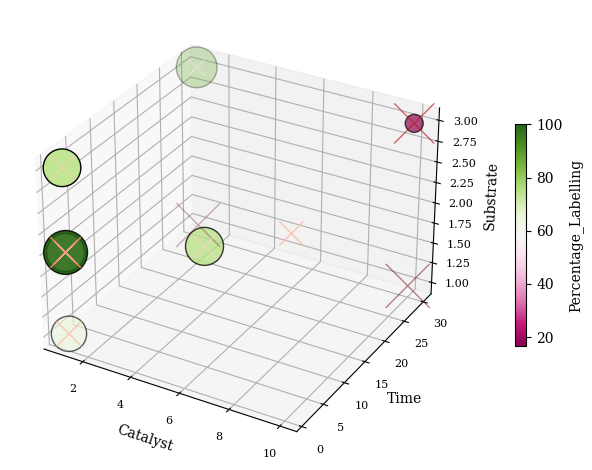

In [7]:
x="Catalyst"
y='Time'
z='Substrate'
c = 'Percentage_Labelling'
on='CTB-LPETGVSEYG'
fig = plt.figure()



ax = fig.add_subplot(111, projection='3d', )
df=eng.results1
df = df[df['Label']==on]
scatter = ax.scatter(df[x], df[y], df[z], c=df[c], cmap='PiYG', marker='o',s=df[c]*10,edgecolor='black' )

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
cbar = plt.colorbar(scatter,pad=0.1,fraction=0.02)
cbar.set_label(c)

on ="CTB-LPET"
df=eng.results1
df = df[df['Label']==on]

scatter = ax.scatter(df[x], df[y], df[z], c=df[c], cmap='Reds', marker='x',s=df[c]*10, )
# cbar = plt.colorbar(scatter)

# ax.set_proj_type('persp', focal_length=0.2)
ax.grid(True)
ax.tick_params(labelsize=8)
plt.tight_layout()

plt.show()